In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils
from keras import layers
from keras import models
from keras.wrappers.scikit_learn import KerasClassifier 

In [27]:
data=pd.read_csv('Final Randomized Dataset v2.csv')
data.head()

,Inter-Arrival Time (in secs),Packet Size,MCS,NB_RB,Application Category
0,0.008782,802,19.86,9.65,VIDEO
1,0.000002,802,18.99,11.15,PERF
2,0.013127,802,19.86,9.65,VIDEO
3,0.000002,802,18.99,11.15,PERF
4,0.000002,802,18.99,11.15,PERF


In [69]:
X=data[['Inter-Arrival Time (in secs)','Packet Size','MCS', 'NB_RB']]
Y=data['Application Category ']
#X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.7, random_state=42)
#print(len(X_train))
#print(len(X_test))
#print(len(Y_train))
#print(len(Y_test))

13080
5606
13080
5606


## Encoding categorical variables

In [ ]:
#encoder = LabelEncoder()
#encoder= data.apply(LabelEncoder().fit_transform)
#encoder.fit(Y_train)

#encoder=OneHotEncoder().fit_transform(Y_train)
#encoded_Y = encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoder)
#dummy_y

x_vars_stdscle=StandardScaler().fit_transform(X) # standardizing the X 
X_train, X_test, Y_train, Y_test= train_test_split(x_vars_stdscle, Y, train_size=0.7, random_state=42)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# one hot encoded
Y_encoded = np_utils.to_categorical(encoded_Y)
Y_encoded[:3]

encoder.fit(Y_train)
encoded_Y_train = encoder.transform(Y_train)
Y_train_encoded=np_utils.to_categorical(encoded_Y_train)
Y_train_encoded

encoder.fit(Y_test)
encoded_Y_test=encoder.transform(Y_test)
Y_test_encoded=np_utils.to_categorical(encoded_Y_train)
Y_test_encoded



## K fold cross validation

In [117]:
# read about the different kinds of optimizers
def create_network():
    network=models.Sequential()
    network.add(layers.Dense(units=2, activation='relu', input_shape=(4,) ))
    network.add(layers.Dense(units=2, activation ='relu'))
    network.add(layers.Dense(units=4, activation='softmax'))
    network.compile(loss='categorical_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
    return network

neural_network=KerasClassifier(build_fn=create_network, epochs=10, batch_size=100, verbose=0)# debugging turned off by setting verbose to 0
seed=7
#np.random.seed(seed)
#kfold=KFold(n_splits=10, shuffle=True)#, random_state=seed)
cross_val_score(neural_network, X, Y_encoded, cv=2)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### !!!!!!OVERFITTING PROBLEMMM!!!!!
## Graph it to see the change of cross validation score with the epochs
    

array([0.61307931, 0.61318634])

## Grid Search for tuning the parameters of Neural Networks

In [126]:
def create_network(optimizer='rmsprop'):
    network=models.Sequential()
    network.add(layers.Dense(units=2, activation='relu', input_shape=(4,) ))
    network.add(layers.Dense(units=2, activation ='relu'))
    network.add(layers.Dense(units=4, activation='softmax'))
    network.compile(loss='categorical_crossentropy', optimizer =optimizer, metrics=['accuracy'])
    return network

neural_network=KerasClassifier(build_fn=create_network, verbose=0)# debugging turned off by setting verb
epochs=[5,10,15,20]
batches=[5,10,100]
optimizers=['rmsprop', 'adam']
hyperparameters=dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid=GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
grid_result=grid.fit(X,Y)


/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [58]:
network=models.Sequential()
network.add(layers.Dense(units=3, activation='relu', input_shape=(4,) ))
network.add(layers.Dense(units=3, activation ='relu'))
network.add(layers.Dense(units=4, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
 

Train on 12980 samples, validate on 100 samples
Epoch 1/10
12980/12980 [==============================] - 2s 185us/step - loss: 0.4748 - val_loss: 0.1546
Epoch 2/10
12980/12980 [==============================] - 0s 20us/step - loss: 0.4774 - val_loss: 0.1566
Epoch 3/10
12980/12980 [==============================] - 0s 21us/step - loss: 0.4802 - val_loss: 0.1543
Epoch 4/10
12980/12980 [==============================] - 0s 20us/step - loss: 0.4785 - val_loss: 0.1555
Epoch 5/10
12980/12980 [==============================] - 0s 20us/step - loss: 0.4842 - val_loss: 0.1553
Epoch 6/10
12980/12980 [==============================] - 0s 20us/step - loss: 0.4654 - val_loss: 0.1530
Epoch 7/10
12980/12980 [==============================] - 0s 20us/step - loss: 0.4821 - val_loss: 0.1544
Epoch 8/10
12980/12980 [==============================] - 0s 20us/step - loss: 0.4853 - val_loss: 0.1542
Epoch 9/10
12980/12980 [==============================] - 0s 21us/step - loss: 0.4847 - val_loss: 0.1570
Epoch 

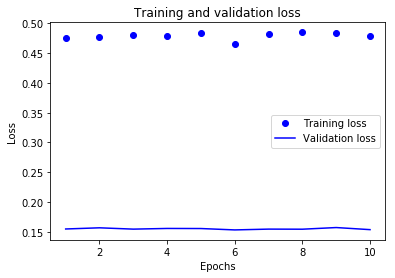

In [111]:
network=models.Sequential()
network.add(layers.Dense(units=2, activation='relu', input_shape=(4,) ))
network.add(layers.Dense(units=2, activation ='relu'))
network.add(layers.Dense(units=4, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
X_val=X_train[:100]
partial_X_train=X_train[100:]
Y_val=Y_train_encoded[:100]
partial_Y_train=Y_train_encoded[100:]
history=model.fit(partial_X_train, partial_Y_train, epochs=10, batch_size=200, validation_data=(X_val, Y_val))
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
X_train.shape[1] # number of features

4

In [130]:

nb_classes=4
batch_size=128
nb_epochs=200
model=Sequential()
model.add(Dense(3, input_dim=4))#input_shape
model.add(Activation('relu'))
model.add(Dropout(0.5)) #?????

model.add(Dense(3))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')


# Model Training
model.fit(X_train, Y_train_encoded , batch_size=batch_size, nb_epoch=nb_epochs,verbose=1)




/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/200
13080/13080 [==============================] - 5s 399us/step - loss: 1.4693
Epoch 2/200
13080/13080 [==============================] - 0s 35us/step - loss: 1.2452
Epoch 3/200
13080/13080 [==============================] - 0s 34us/step - loss: 1.0643
Epoch 4/200
13080/13080 [==============================] - 0s 37us/step - loss: 0.9720
Epoch 5/200
13080/13080 [==============================] - 0s 34us/step - loss: 0.9200
Epoch 6/200
13080/13080 [==============================] - 0s 33us/step - loss: 0.8810
Epoch 7/200
13080/13080 [==============================] - 0s 35us/step - loss: 0.8493
Epoch 8/200
13080/13080 [==============================] - 0s 34us/step - loss: 0.8365
Epoch 9/200
13080/13080 [==============================] - 0s 36us/step - loss: 0.8108
Epoch 10/200
13080/13080 [==============================] - 0s 34us/step - loss: 0.7995
Epoch 11/200
13080/13080 [==============================] - 0s 34us/step - loss: 0.7851
Epoch 12/200
13080/13080 [==============

13080/13080 [==============================] - 0s 32us/step - loss: 0.6738
Epoch 187/200
13080/13080 [==============================] - 0s 32us/step - loss: 0.6788
Epoch 188/200
13080/13080 [==============================] - 0s 33us/step - loss: 0.6757
Epoch 189/200
13080/13080 [==============================] - 0s 33us/step - loss: 0.6713
Epoch 190/200
13080/13080 [==============================] - 0s 32us/step - loss: 0.6810
Epoch 191/200
13080/13080 [==============================] - 0s 32us/step - loss: 0.6717
Epoch 192/200
13080/13080 [==============================] - 0s 34us/step - loss: 0.6703
Epoch 193/200
13080/13080 [==============================] - 0s 33us/step - loss: 0.6697
Epoch 194/200
13080/13080 [==============================] - 0s 32us/step - loss: 0.6648
Epoch 195/200
13080/13080 [==============================] - 0s 33us/step - loss: 0.6707
Epoch 196/200
13080/13080 [==============================] - 0s 33us/step - loss: 0.6671
Epoch 197/200
13080/13080 [========

In [131]:
#Model Prediction
y_train_predclass = model.predict_classes(X_train,batch_size=batch_size)
y_test_predclass = model.predict_classes(X_test,batch_size=batch_size)

print ("\n\nDeep Neural Network  - Train accuracy:",(round(accuracy_score(Y_train,y_train_predclass),3))
      )
#print ("\nDeep Neural Network  - Train Classification Report")
#print (classification_report(Y_train,y_train_predclass))

print ("\nDeep Neural Network - Train Confusion Matrix\n")
print (pd.crosstab(Y_train ,y_train_predclass,rownames = ["Actuall"],colnames = ["Predicted"]) )  


print ("\nDeep Neural Network  - Test accuracy:",(round(accuracy_score(Y_test,y_test_predclass),3)))

#print ("\nDeep Neural Network  - Test Classification Report")
#print (classification_report(Y_test,y_test_predclass))

print ("\nDeep Neural Network - Test Confusion Matrix\n")
print (pd.crosstab(Y_test,y_test_predclass,rownames = ["Actuall"],colnames = ["Predicted"]) )








Deep Neural Network  - Train accuracy: 0.0

Deep Neural Network - Train Confusion Matrix

Predicted     1     3
Actuall              
HTTP       1158     1
PERF       7986     0
PING         54     0
VIDEO         0  3881

Deep Neural Network  - Test accuracy: 0.0

Deep Neural Network - Test Confusion Matrix

Predicted     1     3
Actuall              
HTTP        511     1
PERF       3425     0
PING         20     0
VIDEO         0  1649
